In [17]:
from elasticsearch import Elasticsearch
import json
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

es = Elasticsearch()

result = es.search(
    index="randomdata",
    body={
        "size":0,
        "aggs":{
            "group_by_Date":{
                "date_histogram":{
                    "field":"access_Date",
                    "interval" : "15d"
                },
                "aggs" : {
                    "group_by_phase" : {
                        "terms" : {
                            "field" : "access_phase"
                        },
                        "aggs" : {
                            "unique_ID" : {
                                "terms" : {                           
                                    "field" : "user_ID",
                                    "size" : 99999999
                                }
                            }
                        }
                    }
                }
            }
        }
    }
)

In [18]:
monthlist = result['aggregations']['group_by_Date']['buckets']

D2array = [[0]*100 for i in range(len(monthlist))]
D3array = []

a = len(monthlist)

for i in range(len(monthlist)):
    phaselist = monthlist[i]['group_by_phase']['buckets']
    for j in range(len(phaselist)):
        userslist = phaselist[j]['unique_ID']['buckets']
        if phaselist[j]['key'] is 1:
            D2array[1] = userslist.copy()
        if phaselist[j]['key'] is 2:
            D2array[2] = userslist.copy()
        if phaselist[j]['key'] is 3:
            D2array[3] = userslist.copy()
        if phaselist[j]['key'] is 4:
            D2array[4] = userslist.copy()
        if phaselist[j]['key'] is 5:
            D2array[5] = userslist.copy()
    D3array.append(D2array.copy())

In [24]:
resultarray = [[0]*(a-1) for i in range(a)]

for i in range(0, a):
    for j in range(1, a):
        resultarray[i][j-1] = len(D3array[i][j])
        if len(D3array[i][j]) is 100:
            resultarray[i][j-1] = 0
            


In [25]:
printarray = [[0]*5 for i in range(a)]

for i in range(0, a):
    for j in range(1, a):
        for k in range(j-1, 5):
            printarray[i][j-1] += resultarray[i][k]
        #print(printarray[i][j-1])
            #print(resultarray[i][k])

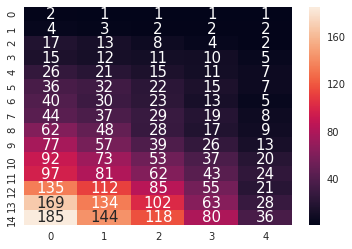

In [26]:
sns.set()
sns.heatmap(pd.DataFrame(printarray), annot=True, annot_kws={"size":15}, fmt="d")

plt.show()

In [30]:
percentarray = [[0]*5 for i in range(a)]


for i in range(0, a):
    for j in range(1, 6):
        percentarray[i][j-1] = printarray[i][j-1] / printarray[i][0]
            

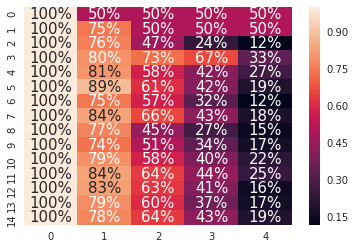

In [31]:
sns.set()
sns.heatmap(pd.DataFrame(percentarray), annot=True, annot_kws={"size":15}, fmt=".0%")

plt.show()

In [12]:
a

31